# Exploring Naive Bayes: Theory, Applications, and Performance Analysis

**Name**:  Conor Brooke  
**Student-ID**:  C00260735  
**Date**:  01/02/2024  
**Link To Notebook Followed**:  [GitHub Repository](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.05-Naive-Bayes.ipynb)  

  
## Notebook Overview
This notebook provides a in depth exploration of the Naive Bayes algorithm, a popular classification technique based on Bayes' Theorem. The notebook covers the theory behind Naive Bayes and demonstrates its application using different datasets, including 'survey_lung_cancer.csv' for Gaussian Naive Bayes and 'spam.csv' for email filtering. The main objectives of this analysis are to understand the mechanics of Naive Bayes, to apply it to different types of data, and to evaluate its performance in classification tasks.


# Notebook Log

## Notebook Understanding

  

## Naive Bayes Classification - Explained

In this notebook, we will delve into an in-depth examination of various algorithms and datasets through the lens of Naive Bayes classification.

Naive Bayes models represent a collection of fast and simple classification algorithms that are often suitable in managing high-dimensional datasets. Their speed and minimal requirement for parameter tuning make them practical as an initial, benchmark for classification challenges. I will provide an intuitive explanation  of the mechanisms underpinning Naive Bayes classifiers, followed by practical demonstrations of their application across datasets.

## Bayesian Classification

Naive Bayes classifiers are a simple way to predict a category based on some features, using a principle called Bayesian classification. This method uses Bayes's theorem, a formula that helps us understand how likely something is, given certain conditions. In essence, it calculates the probability of a category (or label) given some observed features, we can write as $P(L~|~{\rm features})$.
  
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

### Example

Suppose we want to predict the likelihood of getting lung cancer based on whether someone smokes.

**Features**: Smoking status (smoker or non-smoker).

**Label**: Lung cancer risk (high or low).

Let's apply Bayes' theorem to assess the risk of lung cancer based on smoking status with some hypothetical statistics.

- **Given Information**:
  - The overall probability of having lung cancer (P(Lung Cancer)) is 0.01, or 1% of the population.
  - The probability of being a smoker (P(Smoker)) is 0.2, or 20% of the population.
  - The probability of having lung cancer given that you are a smoker (P(Lung Cancer | Smoker)) is 0.02, or 2% of smokers have lung cancer.

We aim to determine the probability that an individual is a smoker, given they have been diagnosed with lung cancer. This is mathematically represented as \(P(\text{Smoker} | \text{Lung Cancer})\).

### Using Bayes' Theorem

Bayes' theorem allows us to compute this probability as follows:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{P(\text{Lung Cancer} | \text{Smoker}) \times P(\text{Smoker})}{P(\text{Lung Cancer})}
$$

**Plugging in the given values**:

$$
P(\text{Smoker} | \text{Lung Cancer}) = \frac{0.02 \times 0.2}{0.01}
$$

After performing the calculation:

$$
P(\text{Smoker} | \text{Lung Cancer}) = 0.4
$$

This means that among individuals diagnosed with lung cancer, there is a 40% probability that they are smokers, according to the provided sample statistics.


## Notebooks Objectives

Under this section, I discuss the aims this notebook will achieve, which include:

- Explaining how **Gaussian Naive Bayes** works using a Lung Cancer dataset. I chose this dataset because it allows the ability to illustrate the effectiveness of Gaussian Naive Bayes in handling continuous data distributions typically encountered in medical datasets.  
  
- Explaining the application of **Multinomial Naive Bayes** using an Email Spam Detection example. This illustrates the algorithm's strength in dealing with discrete data, especially in text classification tasks where features represent the frequency of words or events.  

### CA Requirements Met

This notebook meets the following (CA) requirements:

- **Dataset Change Adaptability**: Demonstrates the flexibility of the Naive Bayes algorithms by applying them to a new dataset, showcasing the process of adapting data preprocessing steps to fit the needs of each algorithm.

- **Parameter Tuning for Multinomial Naive Bayes**: Details the process of tuning parameters of the Multinomial Naive Bayes algorithm to optimize performance for the email spam detection task, including adjustments to the feature selection methods to improve model accuracy.


## Data Understanding

### Initial Data Collection Report
- **Lung Cancer Dataset**: Obtained from Kaggle, this dataset originated from a survey. Initial observations indicated it had an excessive number of features, including unusual ones like 'Peer Pressure'.
- **Email Spam Dataset**: Also sourced from Kaggle, this dataset comprised a collection of spam emails. Initial observations noted the emails were relatively short.

### Data Description
- **Lung Cancer Dataset**: 
    - Size: 276 rows
    - Number of features: 16
    - Null values: None
    - Duplicate rows: 33
- **Email Spam Dataset**:
    - Size: 5157 rows
    - Number of features: 2
    - Null values: None
    - Duplicate rows: 415

### Exploratory Data Analysis (EDA)
- **Lung Cancer Dataset**:
    - **Lung Cancer Occurrence by Gender**: Minimal difference observed between men and women regarding lung cancer occurrence, though a notable increase was seen in men.
    - **Comparison Between No Cancer and Lung Cancer Occurrences**: The dataset was heavily skewed, with nearly all participants reporting lung cancer.
    - **Number of Lung Cancer Occurrences by Smoking Status**: Surprisingly, being a smoker had almost no impact on lung cancer occurrence within this dataset.
    - **Correlation Data**: Features such as SMOKING, GENDER, and SHORTNESS OF BREATH showed surprisingly low correlation with lung cancer occurrence.
    - **Overall**: The dataset requires more non-smokers and older participants to be considered more accurate.
    
- **Email Spam Dataset**:
    - **Email Category Comparison**: The dataset consists of 85% normal emails and 15% spam, indicating a majority of legitimate emails.
    - **General Observations**: Spam emails exhibited a very specific style, potentially skewing the dataset towards easier detection.




## Data Preparation
- **Data Cleaning Steps**: _[Detail the data cleaning process, including handling of missing values, outliers, etc.]_
- **Feature Engineering and Selection**: _[Describe any new features created, features selected for the model, and the rationale behind these choices.]_
- **Data Splitting Methodology**: _[Explain how the data was split into training, validation, and test sets, including any strategies used to ensure balance or representativeness.]_

<br>
<br>  

> **Note**: This notebook is part of my Data Science Continuous Assessment portfolio. It has been enhanced significantly from the original version cloned from GitHub to deepen both theoretical and practical understanding of the underlying machine learning algorithm(s). Each change is documented in the log above to track the evolution of the notebook and analyze the impact of modifications on the algorithm's performance.

<br>  

In [ ]:
#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Understanding Gaussian Naive Bayes

Gaussian Naive Bayes is the simplest type of Naive Bayes classifier. It works on the idea that the data for each category comes from a normal (or Gaussian) distribution. The Gaussian distribution, is a bell-shaped curve that describes how a set of data is spread out, with most values clustering around a central mean and fewer occurring as you move away.

## Lung Cancer Prediction Using Gaussian Naive Bayes

**Link To Kaggle Dataset**:  [Lung Cancer Dataset](https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer/data) 

### Data Understading

In [160]:
lung_cancer_dataset = pd.read_csv('Datasets/survey lung cancer.csv')
lung_cancer_dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [161]:
lung_cancer_dataset.duplicated().sum()

33

In [201]:
rows = len(lung_cancer_dataset)
rows

276

In [162]:
#Checking for null values
lung_cancer_dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [163]:
lung_cancer_dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [164]:
lung_cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Both Gender and Lung_Cancer are of type object, changes must be made to these features during preprocessing.

#### Exploratory Data Analysis

Plotting the distribution between male and female with lung cancer

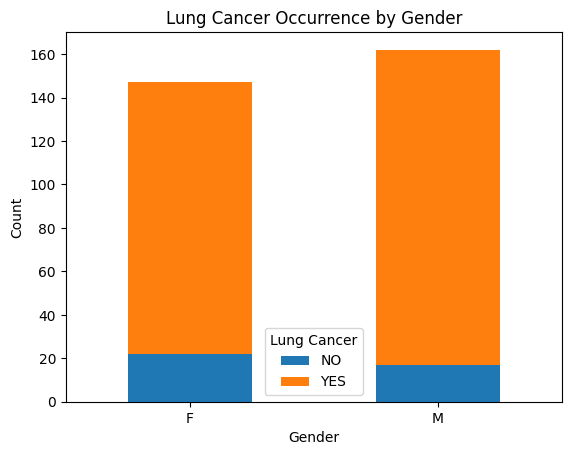

In [165]:

lung_cancer_counts = lung_cancer_dataset.groupby(['GENDER', 'LUNG_CANCER']).size().unstack(fill_value=0)

# Plotting with seaborn for a more appealing visualization
lung_cancer_counts.plot(kind='bar', stacked=True)
plt.title('Lung Cancer Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotates the x-axis labels to be horizontal
plt.legend(title='Lung Cancer')
plt.show()

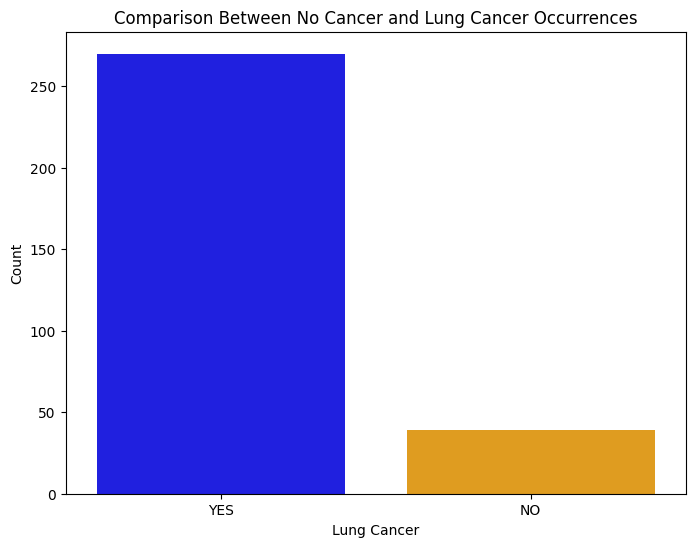

In [166]:
lung_cancer_counts = lung_cancer_dataset['LUNG_CANCER'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 6))  # Sets the figure size for better readability
sns.barplot(x=lung_cancer_counts.index, y=lung_cancer_counts.values, palette=['blue', 'orange'])
plt.title('Comparison Between No Cancer and Lung Cancer Occurrences')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.show()

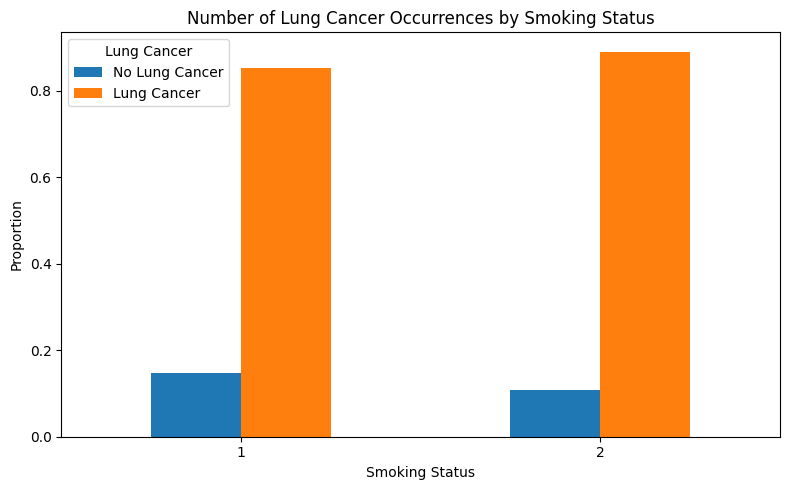

In [167]:
lung_cancer_dataset.groupby('SMOKING')['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

plt.title('Number of Lung Cancer Occurrences by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)

# Adding a legend to clarify what 'Yes' and 'No' refer to
plt.legend(title='Lung Cancer', labels=['No Lung Cancer', 'Lung Cancer'])

# Show plot
plt.tight_layout()
plt.show()

Oddly enough, smoking has a low correlation with 'Lung Cancer' in this dataset. This could be for many reasons like the way smoking is measured (e.g., binary yes/no instead of pack-years) might not capture the true extent of exposure or the presence of other confounding variables.

### Data preprocessing

Dropping duplicates

In [168]:
#Removing Duplicates
lung_cancer_dataset = lung_cancer_dataset.drop_duplicates()

For the Gender column, I mapped the values 'M' and 'F' to integers (0 and 1). For the Lung_Cancer column, containing values 'Yes' and 'No', I also map these to integers (1 for 'Yes' and 0 for 'No').

In [169]:
# Convert 'Gender' to int: Male=0, Female=1
lung_cancer_dataset['GENDER'] = lung_cancer_dataset['GENDER'].map({'M': 1, 'F': 0})

# Convert 'Lung_Cancer' to int: No=0, Yes=1
lung_cancer_dataset['LUNG_CANCER'] = lung_cancer_dataset['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

In [170]:
lung_cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Correlation between features

In [171]:
# Correlation for numerical features
correlations = lung_cancer_dataset.corr()['LUNG_CANCER'].sort_values()

print("Correlation with Lung_Cancer:\n", correlations)

Correlation with Lung_Cancer:
 SMOKING                  0.034878
GENDER                   0.053666
SHORTNESS OF BREATH      0.064407
AGE                      0.106305
CHRONIC DISEASE          0.143692
ANXIETY                  0.144322
FATIGUE                  0.160078
YELLOW_FINGERS           0.189192
CHEST PAIN               0.194856
PEER_PRESSURE            0.195086
WHEEZING                 0.249054
COUGHING                 0.253027
SWALLOWING DIFFICULTY    0.268940
ALCOHOL CONSUMING        0.294422
ALLERGY                  0.333552
LUNG_CANCER              1.000000
Name: LUNG_CANCER, dtype: float64


Dropping columns with a low correlation

In [172]:
df_new = lung_cancer_dataset.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])

In [173]:
df_new

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,2,2,1,1,2,1,2,2,2,2,2,1
1,1,1,1,2,2,2,1,1,1,2,2,1
2,1,1,2,1,2,1,2,1,2,1,2,0
3,2,2,1,1,1,1,1,2,1,2,2,0
4,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,2,2,2,1,1,2,2,1,2,2,1,1
280,1,1,1,2,2,2,1,1,1,1,1,0
281,1,1,1,1,2,2,1,1,1,1,2,0
282,2,2,1,1,1,1,1,1,1,2,2,0


## Modeling

In [174]:
#Splitting independent and dependent variables
X = df_new.drop('LUNG_CANCER', axis = 1)
y = df_new['LUNG_CANCER']

### Gaussian Naive Bayes

In [175]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set(20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


#### Fitting Gaussian Naive Bayes classifier to the training set 

In [176]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [177]:
#Predicting output using test data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Evaluation

Calculate the Confusion Matrix


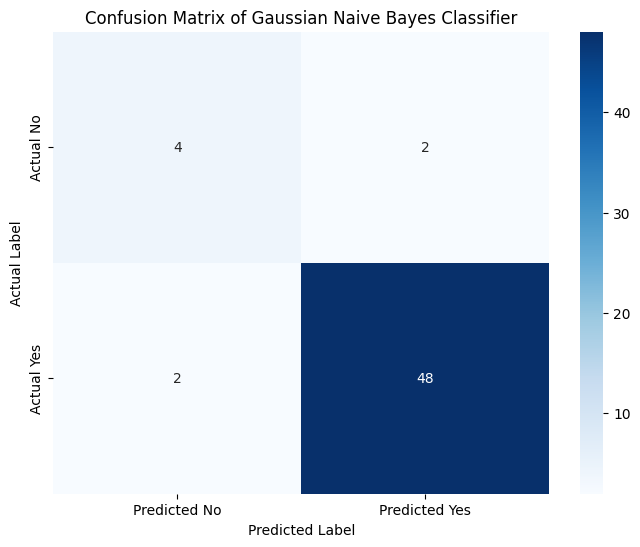

In [178]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_gnb_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes Classifier')
plt.show()


The classification_report function provides metrics for each class and also includes averages, giving a comprehensive overview of the model's performance across all classes. 

In [179]:
#Model accuracy
from sklearn.metrics import classification_report

gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.96      0.96      0.96        50

    accuracy                           0.93        56
   macro avg       0.81      0.81      0.81        56
weighted avg       0.93      0.93      0.93        56



<br>

## Email Spam Detection with Multinominal Naive Bayes


The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.

The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

In this context, the principle remains unchanged, but rather than approximating the data distribution with an optimal Gaussian curve, we employ a best-fit multinomial distribution to model the distribution of words or features in emails for spam detection.

**Link To Kaggle Dataset**:  [Spam Email Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/spam-email) 

### Data Understading

In [180]:
spam = pd.read_csv('Datasets/spam.csv')
spam.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [181]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [203]:
rows = len(spam)
rows

5572

In [182]:
spam.Message.value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Ok                                                                                                                                                           4
Ok.                                                                                                                                                          4
                                                                                                                                                            ..
I gotta collect da car at 6 lei.      

In [183]:
spam.duplicated().sum()

415

In [184]:
spam.isna().sum()

Category    0
Message     0
dtype: int64

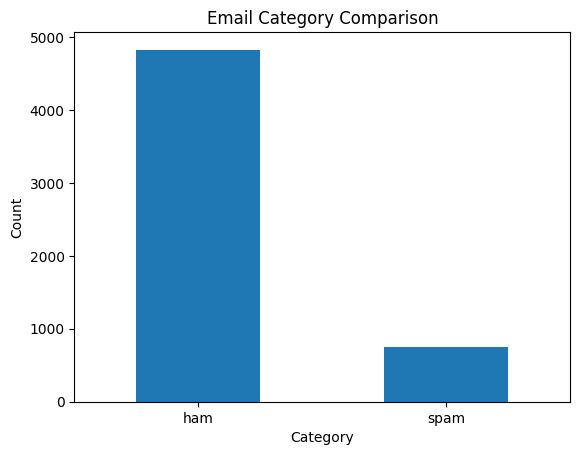

In [185]:
# Count the occurrences of each category
category_counts = spam['Category'].value_counts()

# Plotting
category_counts.plot(kind='bar')
plt.title('Email Category Comparison')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure the x-tick labels are horizontal for readability
plt.show()


### Data Preproccsing

#### Feature Engineering

In [186]:
spam['Spam'] = spam['Category'].replace({'spam': 1, 'ham': 0})

spam.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [187]:
spam = spam.drop('Category', axis=1)

In [188]:
spam.head()

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


### Model

In [189]:
X = spam.Message
y = spam.Spam

In [190]:

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25 ,random_state=42)

Here is a representative entry from the data:

In [191]:
print(X_train.head())

4281    WINNER!! As a valued network customer you have...
585     So how's scotland. Hope you are not over showi...
4545                  when you and derek done with class?
3034                          Aight, lemme know what's up
2758                Yo we are watching a movie on netflix
Name: Message, dtype: object


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.

In [192]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)


With this pipeline, we can begin training the model

In [193]:
model.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

### Evaluation

Below I'm testing the model with two emails, one looks normal, while the other is clearly spam

In [194]:
emails = [
    "Hi there, Just checking in to confirm our meeting tomorrow at 10 AM. Best, John",
    "Congratulations! You've been selected to win a FREE iPhone. Click here to claim your prize NOW: [link]",
    "Your appointment with Dr. Smith is scheduled for 9/15 at 3 PM. Please call our office if you need to reschedule.",
    "You're a winner! Claim your $1000 Amazon gift card today. Just visit our site and enter your details to start shopping!",
    "Can we reschedule our call to next week? I'm available on Wednesday or Thursday after 2 PM. Thanks, Emily",
    "Exclusive Offer: Get 50'%' off on your next purchase with us. Hurry, offer ends soon! Click here to shop now: [link]",
    "Looking forward to our lunch this Friday. Let's meet at the usual place around noon?",
    "Earn money from home today. Thousands have already joined! Never work again! Click here to start: [link]"
]

In [195]:
model.predict(emails)

array([0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

Eventhough the last email could be classified as spam the model didn't detect it

#### Predicting the labels of the test data

In [196]:
y_pred = model.predict(X_test)

#### Calculate accuracy

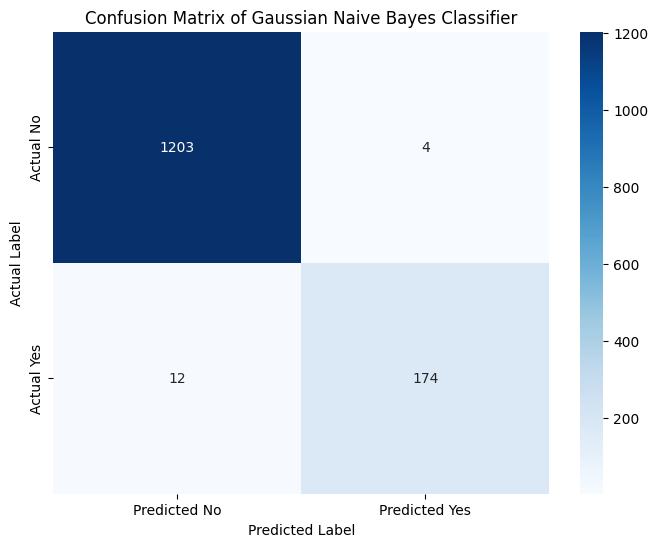

In [197]:
matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes Classifier')
plt.show()

In [198]:
#Model accuracy
model_report = classification_report(y_test, y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1207
           1       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



Tune Algorithm above